# Part II - Tripdata Explanatory analysis
## by Matthew Rivera

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust path as needed)
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Basic cleaning (from EDA)
df_clean = df.dropna(subset=['start_station_id', 'end_station_id'])
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['start_hour'] = df_clean['start_time'].dt.hour

<ipython-input-2-d6375fc92b5d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
<ipython-input-2-d6375fc92b5d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['start_hour'] = df_clean['start_time'].dt.hour


**Investigation** **Overview**

In this investigation, I examined the characteristics of bike-sharing trips to understand usage patterns. The main focus was on trip duration, user type, and temporal trends (start hour).

**Dataset** **Overview**

The data consists of trip details for approximately 183,000 Ford GoBike trips in February 2019. Attributes include trip duration, start/end times, station IDs, and user type. About 2,000 trips were removed due to missing station or user data.

**Visualization 1:** Distribution of Trip Durations

**Purpose**: Highlight the range and skewness of trip durations.

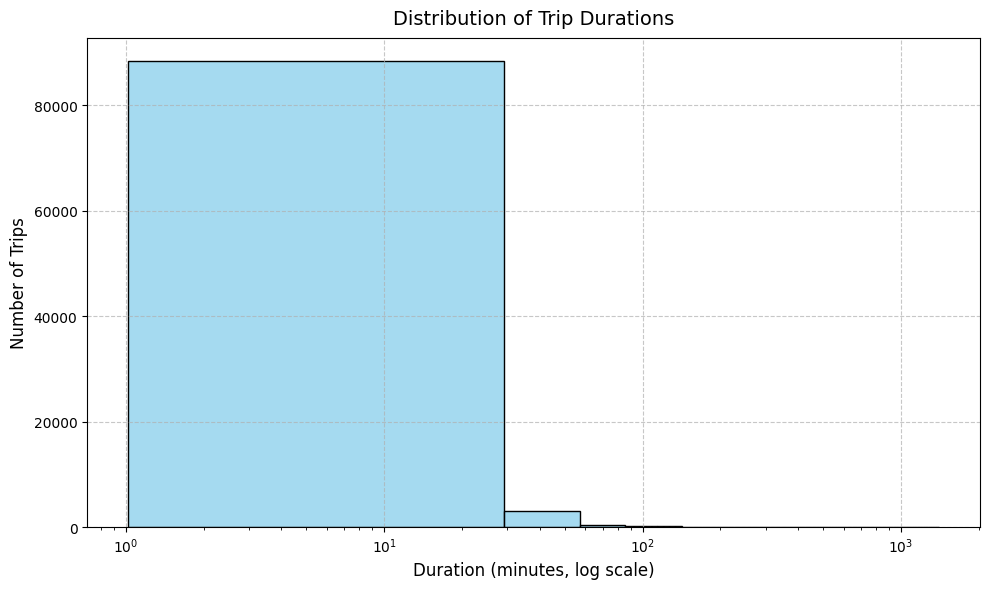

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['duration_sec'] / 60, bins=50, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Trip Durations', fontsize=14, pad=10)
plt.xlabel('Duration (minutes, log scale)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comment**: "Most trips last less than 20 minutes, with a long tail of infrequent longer trips. A log scale highlights this skewness."

**Visualization 2:** Trip Duration by User Type

<ipython-input-5-b7504da08d5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='user_type', y=df_clean['duration_sec'] / 60, palette='Set2', linewidth=1.5)


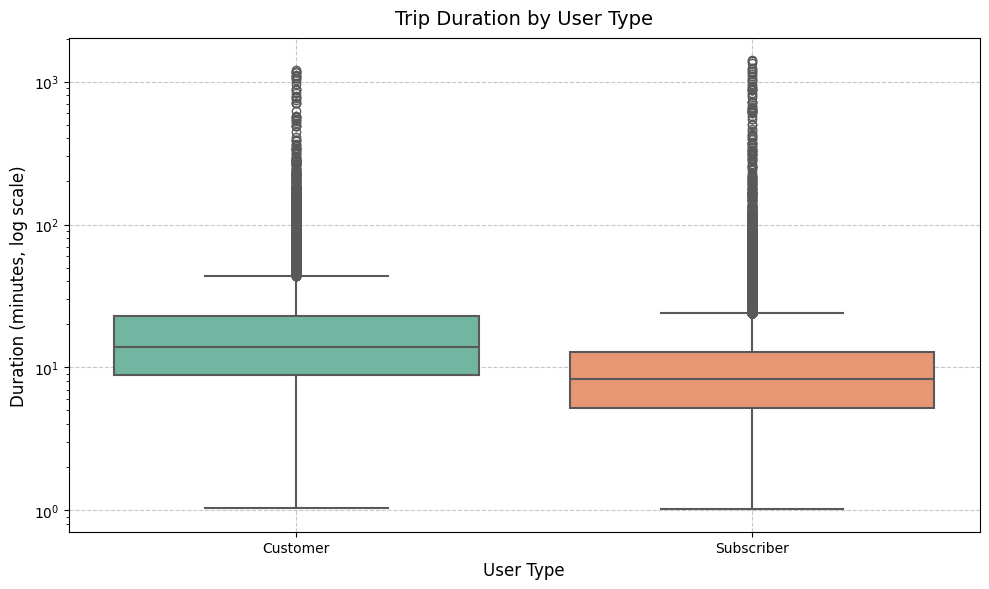

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='user_type', y=df_clean['duration_sec'] / 60, palette='Set2', linewidth=1.5)
plt.yscale('log')
plt.title('Trip Duration by User Type', fontsize=14, pad=10)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration (minutes, log scale)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comment**: "Subscribers tend to take shorter trips (median ~10 minutes) compared to customers (median ~15 minutes), with customers showing more variability."

**Visualization 3:** Hourly Trip Patterns

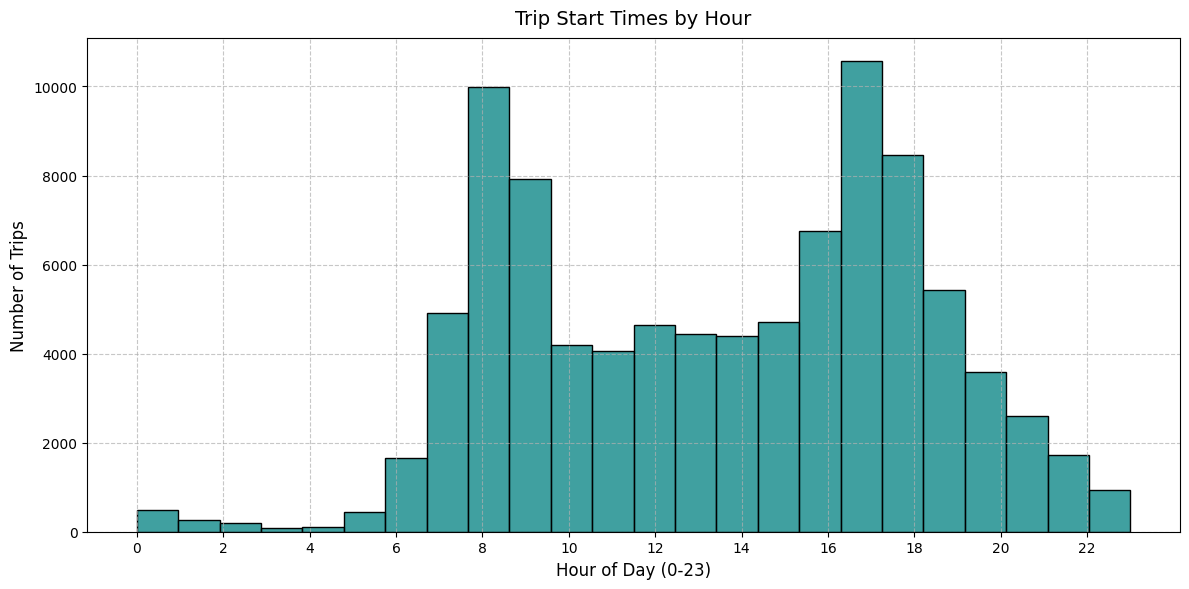

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='start_hour', bins=24, color='teal', edgecolor='black')
plt.title('Trip Start Times by Hour', fontsize=14, pad=10)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24, 2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comment**: "Peaks at 8 AM and 5 PM suggest commuting drives usage, with quieter periods overnight."

**Visualization 4:** Top Stations by User Type (Optional)

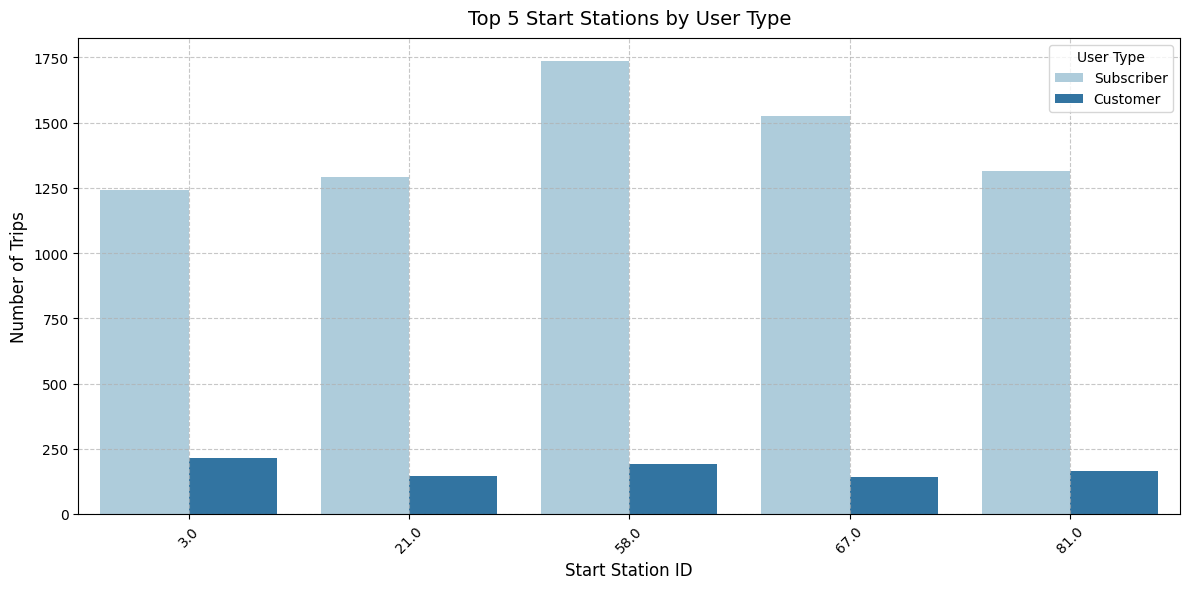

In [6]:
top_stations = df_clean['start_station_id'].value_counts().head(5).index
df_top = df_clean[df_clean['start_station_id'].isin(top_stations)]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='start_station_id', hue='user_type', palette='Paired')
plt.title('Top 5 Start Stations by User Type', fontsize=14, pad=10)
plt.xlabel('Start Station ID', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.legend(title='User Type', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comment**: "Stations like 58.0 are heavily used by subscribers, possibly near workplaces or transit hubs."